In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


#Imports

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
tf.config.run_functions_eagerly(True)
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, VGG19
#from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as mat
import argparse
import Augmentor
import cv2
import os
import pandas as pd
import shutil
import random
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os

#Data Preprocessing

In [ ]:
# Directory with our training covid pictures
train_covid_dir = os.path.join('/content/drive/MyDrive/Project_SET/covid_prediction_dataset/train/COVID');

# Directory with our training normal pictures
train_normal_dir = os.path.join('/content/drive/MyDrive/Project_SET/covid_prediction_dataset/train/Normal')

#dir for training P
train_VP_dir = os.path.join('/content/drive/MyDrive/Project_SET/covid_prediction_dataset/train/ViralPneumonia');

#dir for traing Opac
train_LOP_dir = os.path.join('/content/drive/MyDrive/Project_SET/covid_prediction_dataset/train/LungOpacity');

# Directory covid val
validation_covid_dir = os.path.join('/content/drive/MyDrive/Project_SET/covid_prediction_dataset/test/COVID')

# Directory normal val
validation_normal_dir = os.path.join('/content/drive/MyDrive/Project_SET/covid_prediction_dataset/test/Normal')

#dir for vp val
validation_VP_dir = os.path.join('/content/drive/MyDrive/Project_SET/covid_prediction_dataset/test/ViralPneumonia')

#dir for opacity val
validation_LOP_dir = os.path.join('/content/drive/MyDrive/Project_SET/covid_prediction_dataset/test/LungOpacity')



In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:11])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_VP_names = os.listdir(train_VP_dir)
print(train_VP_names[:11])

train_LOP_names = os.listdir(train_LOP_dir)
print(train_LOP_names[:10])

validation_covid_names = os.listdir(validation_covid_dir)

validation_normal_names = os.listdir(validation_normal_dir)

validation_VP_names = os.listdir(validation_VP_dir)

validation_LOP_names = os.listdir(validation_LOP_dir)

['COVID-1307.png', 'COVID-1334.png', 'COVID-1323.png', 'COVID-1330.png', 'COVID-1287.png', 'COVID-1296.png', 'COVID-1326.png', 'COVID-1329.png', 'COVID-1299.png', 'COVID-1324.png', 'COVID-1312.png']
['Normal-809 (1).png', 'Normal-808 (1).png', 'Normal-1004.png', 'Normal-1003.png', 'Normal-1010.png', 'Normal-1011.png', 'Normal-1000.png', 'Normal-1008.png', 'Normal-1001.png', 'Normal-1012.png']
['Viral Pneumonia-1073.png', 'Viral Pneumonia-1075.png', 'Viral Pneumonia-1059.png', 'Viral Pneumonia-1057.png', 'Viral Pneumonia-1052.png', 'Viral Pneumonia-1054.png', 'Viral Pneumonia-1069.png', 'Viral Pneumonia-1071.png', 'Viral Pneumonia-1053.png', 'Viral Pneumonia-1044.png', 'Viral Pneumonia-1027.png']
['Lung_Opacity-1077.png', 'Lung_Opacity-1068.png', 'Lung_Opacity-1064.png', 'Lung_Opacity-1070.png', 'Lung_Opacity-1094.png', 'Lung_Opacity-1040.png', 'Lung_Opacity-1099.png', 'Lung_Opacity-1028.png', 'Lung_Opacity-1056.png', 'Lung_Opacity-1038.png']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import skimage.io, skimage.color, skimage.feature

In [ ]:
X_train_covid , y_train_covid = [],[]#Covid Training Image generation
for img_file in train_covid_names:
  img = skimage.io.imread(fname=os.path.sep.join([train_covid_dir, img_file] ))
  resized_img = cv2.resize(img,(224,224))
  color_img = skimage.color.gray2rgb(resized_img)
  X_train_covid.append(color_img)
  y_train_covid.append(1)




In [ ]:
X_train_normal , y_train_normal = [],[]#Normal Training image
for img_file in train_normal_names:
  img = skimage.io.imread(fname=os.path.sep.join([train_normal_dir, img_file] ))
  resized_img = cv2.resize(img,(224,224))
  color_img = skimage.color.gray2rgb(resized_img)
  X_train_normal.append(color_img)
  y_train_normal.append(0)




In [ ]:
X_train_VP , y_train_VP = [],[]#Pnemonia Training Image generation
for img_file in train_VP_names:
  img = skimage.io.imread(fname=os.path.sep.join([train_VP_dir, img_file] ))
  resized_img = cv2.resize(img,(224,224))
  color_img = skimage.color.gray2rgb(resized_img)
  X_train_VP.append(color_img)
  y_train_VP.append(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Pass-through of possibly RGB images in gray2rgb is deprecated. In version 0.19, input arrays will always be considered grayscale, even if the last dimension has length 3 or 4. To prevent this warning and ensure compatibility with future versions, detect RGB images outside of this function.
  """


In [ ]:
X_train_LOP , y_train_LOP = [],[]#Lung Opac training image generation
for img_file in train_LOP_names:
  img = skimage.io.imread(fname=os.path.sep.join([train_LOP_dir, img_file] ))
  resized_img = cv2.resize(img,(224,224))
  color_img = skimage.color.gray2rgb(resized_img)
  X_train_LOP.append(color_img)
  y_train_LOP.append(3)

In [ ]:
X_test_covid , y_test_covid = [],[]#covid test image generation
for img_file in validation_covid_names:
  img = skimage.io.imread(fname=os.path.sep.join([validation_covid_dir, img_file] ))
  resized_img = cv2.resize(img,(224,224))
  color_img = skimage.color.gray2rgb(resized_img)
  X_test_covid.append(color_img)
  y_test_covid.append(1)



In [ ]:
X_test_normal , y_test_normal = [],[]#normal lung test image generation
for img_file in validation_normal_names:
  img = skimage.io.imread(fname=os.path.sep.join([validation_normal_dir, img_file] ))
  resized_img = cv2.resize(img,(224,224))
  color_img = skimage.color.gray2rgb(resized_img)
  X_test_normal.append(color_img)
  y_test_normal.append(0)

In [ ]:
X_test_VP , y_test_VP = [],[]#Viral pnemonia test image generation
for img_file in validation_VP_names:
  img = skimage.io.imread(fname=os.path.sep.join([validation_VP_dir, img_file] ))
  resized_img = cv2.resize(img,(224,224))
  color_img = skimage.color.gray2rgb(resized_img)
  X_test_VP.append(color_img)
  y_test_VP.append(2)

NameError: ignored

In [ ]:
X_test_LOP , y_test_LOP = [],[]#Lung opacity test image generation
for img_file in validation_LOP_names:
  img = skimage.io.imread(fname=os.path.sep.join([validation_LOP_dir, img_file] ))
  resized_img = cv2.resize(img,(224,224))
  color_img = skimage.color.gray2rgb(resized_img)
  X_test_LOP.append(color_img)
  y_test_LOP.append(3)

In [ ]:
print('total training covid images:', len(os.listdir(train_covid_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training Viral Pneumonia images:', len(os.listdir(train_VP_dir)))             #printing the number of images per variable (test and validation)
print('total training Lung Opacity images:', len(os.listdir(train_LOP_dir)))
print('total validation covid images:', len(os.listdir(validation_covid_dir)))
print('total validation normal images:', len(os.listdir(validation_normal_dir)))
print('total validation Pneumonia images:', len(os.listdir(validation_VP_dir)))
print('total validation Lung Opacity images:', len(os.listdir(validation_LOP_dir)))


total training covid images: 700
total training normal images: 699
total training Viral Pneumonia images: 700
total training Lung Opacity images: 699
total validation covid images: 150
total validation normal images: 149
total validation Pneumonia images: 150
total validation Lung Opacity images: 149


In [ ]:
X_train_covid = np.array(X_train_covid)     #np array conversion
X_train_normal = np.array(X_train_normal)
X_train_VP = np.array(X_train_VP)
X_train_LOP = np.array(X_train_LOP)
X_test_covid = np.array(X_test_covid)
X_test_normal = np.array(X_test_normal)
X_test_VP = np.array(X_test_VP)
X_test_LOP = np.array(X_test_LOP)

In [ ]:
y_train_covid = np.array(y_train_covid)     #np array conversion
y_train_normal = np.array(y_train_normal)
y_train_VP = np.array(y_train_VP)
y_train_LOP = np.array(y_train_LOP)
y_test_covid = np.array(y_test_covid)
y_test_normal = np.array(y_test_normal)
y_test_VP = np.array(y_test_VP)
y_test_LOP = np.array(y_test_LOP)

In [ ]:
print(X_train_covid.shape)    #verifying correct shapes
print(X_train_normal.shape)
print(X_train_VP.shape)
print(X_train_LOP.shape)
print(X_test_covid.shape)
print(X_test_normal.shape)
print(X_test_VP.shape)
print(X_test_LOP.shape)

(700, 224, 224, 3)
(699, 224, 224, 3)
(700, 224, 224, 3)
(699, 224, 224, 3)
(150, 224, 224, 3)
(149, 224, 224, 3)
(150, 224, 224, 3)
(149, 224, 224, 3)


In [ ]:
X_train_covid_scaled = X_train_covid / 255            #scale the data
X_train_normal_scaled = X_train_normal / 255
X_train_VP_scaled = X_train_VP / 255
X_train_LOP_scaled = X_train_LOP / 255
X_test_covid_scaled = X_test_covid / 255
X_test_normal_scaled = X_test_normal / 255
X_test_VP_scaled = X_test_VP / 255
X_test_LOP_scaled = X_test_LOP / 255

In [ ]:
X_train = np.concatenate((X_train_covid_scaled , X_train_normal_scaled, X_train_VP_scaled, X_train_LOP_scaled))   #create train vectors as a whole
y_train = np.concatenate((y_train_covid , y_train_normal, y_train_VP, y_train_LOP))

X_test = np.concatenate((X_test_covid_scaled , X_test_normal_scaled, X_test_VP_scaled, X_test_LOP_scaled))      #create test vectors as a whole
y_test = np.concatenate((y_test_covid , y_test_normal, y_test_VP, y_test_LOP))

X = np.concatenate((X_test , X_train))    #create a whole train data with all scaled data (normal, COVID, VP, LOP)
y = np.concatenate((y_test , y_train))    #create a whole test data with all scaled data (normal, COVID, VP, LOP)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) #perform a random split on the data so the data is not catagorized prior to training
#X_train #used for validation

#Build Model MobileNet

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224,3), trainable=False)



In [ ]:
lung_cases = 4

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(lung_cases, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 2,915,908
Trainable params: 657,924
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['sparse_categorical_accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4, min_delta=0.01, mode='min')#early stopping

In [ ]:
%%time
hist = model.fit(X_train, y_train, epochs=100, callbacks=callback, validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


68/68 [==============================] - 19s 245ms/step - loss: 0.4085 - sparse_categorical_accuracy: 0.8393 - val_loss: 0.2084 - val_sparse_categorical_accuracy: 0.9062
Epoch 2/100
68/68 [==============================] - 15s 224ms/step - loss: 0.1942 - sparse_categorical_accuracy: 0.9245 - val_loss: 0.1919 - val_sparse_categorical_accuracy: 0.9265
Epoch 3/100
68/68 [==============================] - 14s 208ms/step - loss: 0.1244 - sparse_categorical_accuracy: 0.9590 - val_loss: 0.1791 - val_sparse_categorical_accuracy: 0.9375
Epoch 4/100
68/68 [==============================] - 14s 208ms/step - loss: 0.1166 - sparse_categorical_accuracy: 0.9544 - val_loss: 0.1802 - val_sparse_categorical_accuracy: 0.9357
Epoch 5/100
68/68 [==============================] - 14s 209ms/step - loss: 0.0871 - sparse_categorical_accuracy: 0.9692 - val_loss: 0.2215 - val_sparse_categorical_accuracy: 0.9228
Epoch 6/100
68/68 [==============================] - 14s 208ms/step - loss: 0.0586 - sparse_categorica

In [ ]:
import numpy as np

In [ ]:
y_pred = np.round(model.predict(X_test, batch_size=8))
#Compute the argmax to get the levels from one hot
M_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
cm1 = confusion_matrix(y_test, M_pred)
print(cm1)
report = classification_report(y_test, M_pred)
print(report)

[[155   1   2   0]
 [  4 156   0   9]
 [ 12   2 154   2]
 [  1  13   0 169]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       158
           1       0.91      0.92      0.91       169
           2       0.99      0.91      0.94       170
           3       0.94      0.92      0.93       183

    accuracy                           0.93       680
   macro avg       0.93      0.93      0.93       680
weighted avg       0.93      0.93      0.93       680



In [ ]:
eval = model.evaluate(X_test,y_test)
eval

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


 5/22 [=====>........................] - ETA: 0s - loss: 0.3081 - sparse_categorical_accuracy: 0.9125

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


22/22 [==============================] - 1s 33ms/step - loss: 0.2242 - sparse_categorical_accuracy: 0.9353


[0.2242044359445572, 0.9352940917015076]

#VGG16

In [ ]:
# initialize the initial learning rate, number of epochs, and batch size
INIT_LR = 1e-3
baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the output
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation='relu')(headModel)
headModel = Dense(lung_cases, activation="softmax")(headModel)

model_VGG16 = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

In [ ]:

# compile our model
opt = Adam(lr=INIT_LR)
model_VGG16.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["sparse_categorical_accuracy"])
# train the head of the network



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
%%time
H = model_VGG16.fit(X_train, y_train, validation_split=0.2,callbacks=callback, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
68/68 [==============================] - 22s 327ms/step - loss: 0.9109 - sparse_categorical_accuracy: 0.6303 - val_loss: 0.6437 - val_sparse_categorical_accuracy: 0.7445
Epoch 2/100
68/68 [==============================] - 22s 323ms/step - loss: 0.5669 - sparse_categorical_accuracy: 0.7721 - val_loss: 0.5227 - val_sparse_categorical_accuracy: 0.7776
Epoch 3/100
68/68 [==============================] - 22s 323ms/step - loss: 0.4711 - sparse_categorical_accuracy: 0.8089 - val_loss: 0.4414 - val_sparse_categorical_accuracy: 0.8419
Epoch 4/100
68/68 [==============================] - 22s 323ms/step - loss: 0.4162 - sparse_categorical_accuracy: 0.8301 - val_loss: 0.3861 - val_sparse_categorical_accuracy: 0.8566
Epoch 5/100
68/68 [==============================] - 22s 322ms/step - loss: 0.3875 - sparse_categorical_accuracy: 0.8402 - val_loss: 0.3655 - val_sparse_categorical_accuracy: 0.8695
Epoch 6/100
68/68 [==============================] - 22s 322ms/step - loss: 0.3406 - spars

In [ ]:
y_pred2 = np.round(model_VGG16.predict(X_test, batch_size=8))
#Compute the argmax to get the levels from one hot
V16_pred = tf.argmax(y_pred2, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
cm16 = confusion_matrix(y_test, V16_pred)
print(cm16)
report16 = classification_report(y_test, V16_pred)
print(report16)

[[156   0   2   0]
 [  4 114   0  51]
 [ 14   1 145  10]
 [  2  16   1 164]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       158
           1       0.87      0.67      0.76       169
           2       0.98      0.85      0.91       170
           3       0.73      0.90      0.80       183

    accuracy                           0.85       680
   macro avg       0.87      0.85      0.85       680
weighted avg       0.86      0.85      0.85       680



In [ ]:
eval_VGG16 = model_VGG16.evaluate(X_test,y_test)
eval_VGG16

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


22/22 [==============================] - 2s 98ms/step - loss: 0.3197 - sparse_categorical_accuracy: 0.8647


[0.31965717673301697, 0.8647058606147766]

#VGG19

In [ ]:
# initialize the initial learning rate, number of epochs, and batch size
INIT_LR = 1e-3
BS = 8
baseModel2 = VGG19(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
headModel2 = baseModel2.output
headModel2 = AveragePooling2D(pool_size=(4, 4))(headModel2)
headModel2 = Flatten(name="flatten")(headModel2)
headModel2 = Dense(512, activation='relu')(headModel2)
headModel2 = Dense(lung_cases, activation="softmax")(headModel2)

model_VGG19 = Model(inputs=baseModel2.input, outputs=headModel2)

for layer in baseModel2.layers:
    layer.trainable = False

In [ ]:
# compile our model
opt = Adam(lr=INIT_LR)
model_VGG19.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["sparse_categorical_accuracy"])
# train the head of the network


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
%%time
Hv19 = model_VGG19.fit(X_train, y_train, validation_split=0.2,callbacks=callback, epochs=100, batch_size=BS)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
272/272 [==============================] - 42s 126ms/step - loss: 0.8356 - sparse_categorical_accuracy: 0.6225 - val_loss: 0.5672 - val_sparse_categorical_accuracy: 0.7849
Epoch 2/100
272/272 [==============================] - 33s 123ms/step - loss: 0.5453 - sparse_categorical_accuracy: 0.7615 - val_loss: 0.4720 - val_sparse_categorical_accuracy: 0.8217
Epoch 3/100
272/272 [==============================] - 33s 123ms/step - loss: 0.4779 - sparse_categorical_accuracy: 0.7970 - val_loss: 0.4540 - val_sparse_categorical_accuracy: 0.8162
Epoch 4/100
272/272 [==============================] - 33s 123ms/step - loss: 0.4413 - sparse_categorical_accuracy: 0.8076 - val_loss: 0.5100 - val_sparse_categorical_accuracy: 0.7849
Epoch 5/100
272/272 [==============================] - 33s 123ms/step - loss: 0.3880 - sparse_categorical_accuracy: 0.8481 - val_loss: 0.3927 - val_sparse_categorical_accuracy: 0.8346
Epoch 6/100
272/272 [==============================] - 33s 123ms/step - loss: 0.

In [ ]:
y_pred3 = np.round(model_VGG19.predict(X_test, batch_size=8))
#Compute the argmax to get the levels from one hot
V19_pred = tf.argmax(y_pred3, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
cm19 = confusion_matrix(y_test, V19_pred)
print(cm19)
report19 = classification_report(y_test, V19_pred)
print(report19)

[[156   1   1   0]
 [  1 158   0  10]
 [ 17   9 139   5]
 [  1  57   0 125]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       158
           1       0.70      0.93      0.80       169
           2       0.99      0.82      0.90       170
           3       0.89      0.68      0.77       183

    accuracy                           0.85       680
   macro avg       0.87      0.86      0.85       680
weighted avg       0.87      0.85      0.85       680



In [ ]:
eval_VGG19 = model_VGG19.evaluate(X_test,y_test)
eval_VGG19

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


22/22 [==============================] - 3s 112ms/step - loss: 0.3846 - sparse_categorical_accuracy: 0.8529


[0.3846127986907959, 0.8529411554336548]

#DenseNET201

In [ ]:
# initialize the initial learning rate, number of epochs, and batch size
INIT_LR = 1e-3
baseModel3 = DenseNet201(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
headModel3 = baseModel3.output
headModel3 = AveragePooling2D(pool_size=(4, 4))(headModel3)
headModel3 = Flatten(name="flatten")(headModel3)
headModel3 = Dense(512, activation='relu')(headModel3)
headModel3 = Dense(4, activation="softmax")(headModel3)

model_DN201 = Model(inputs=baseModel3.input, outputs=headModel3)

for layer in baseModel3.layers:
    layer.trainable = False

In [ ]:
# compile our model
opt = Adam(lr=INIT_LR)
model_DN201.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["sparse_categorical_accuracy"])
# train the head of the network

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
%%time
H_DN = model_DN201.fit(X_train, y_train, validation_split=0.2,callbacks=callback, epochs=100)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
68/68 [==============================] - 37s 543ms/step - loss: 0.5478 - sparse_categorical_accuracy: 0.7675 - val_loss: 0.3315 - val_sparse_categorical_accuracy: 0.8658
Epoch 2/100
68/68 [==============================] - 37s 543ms/step - loss: 0.2544 - sparse_categorical_accuracy: 0.9024 - val_loss: 0.2868 - val_sparse_categorical_accuracy: 0.8897
Epoch 3/100
68/68 [==============================] - 37s 538ms/step - loss: 0.1941 - sparse_categorical_accuracy: 0.9300 - val_loss: 0.2835 - val_sparse_categorical_accuracy: 0.8934
Epoch 4/100
68/68 [==============================] - 37s 543ms/step - loss: 0.1500 - sparse_categorical_accuracy: 0.9461 - val_loss: 0.2877 - val_sparse_categorical_accuracy: 0.8879
Epoch 5/100
68/68 [==============================] - 37s 541ms/step - loss: 0.1196 - sparse_categorical_accuracy: 0.9590 - val_loss: 0.2439 - val_sparse_categorical_accuracy: 0.9026
Epoch 6/100
68/68 [==============================] - 37s 540ms/step - loss: 0.0868 - spars

In [ ]:
y_pred4 = np.round(model_DN201.predict(X_test, batch_size=8))
#Compute the argmax to get the levels from one hot
D_pred = tf.argmax(y_pred4, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
cm201 = confusion_matrix(y_test, D_pred)
print(cm201)
reportD = classification_report(y_test, D_pred)
print(reportD)

[[148   1   8   1]
 [  0 148   0  21]
 [  8   0 159   3]
 [  3  22   1 157]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       158
           1       0.87      0.88      0.87       169
           2       0.95      0.94      0.94       170
           3       0.86      0.86      0.86       183

    accuracy                           0.90       680
   macro avg       0.90      0.90      0.90       680
weighted avg       0.90      0.90      0.90       680



In [ ]:
eval_DN201 = model_DN201.evaluate(X_test,y_test)
eval_DN201

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


22/22 [==============================] - 5s 224ms/step - loss: 0.3251 - sparse_categorical_accuracy: 0.9015


[0.32508954405784607, 0.9014706015586853]

#Visual Aids

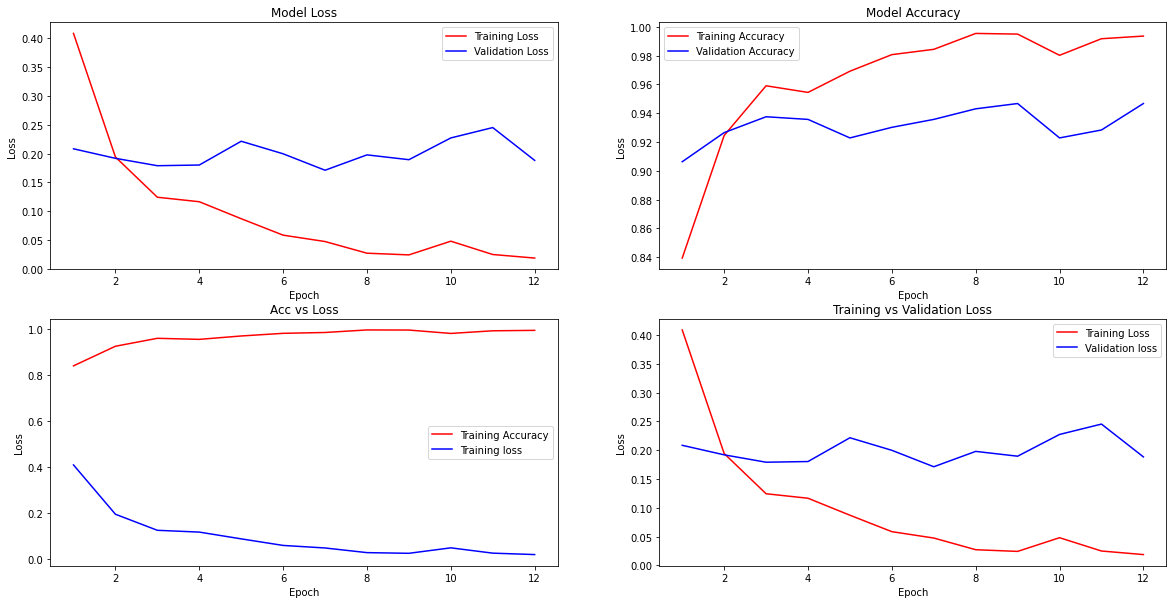

In [ ]:
#MobileNet
training_loss = hist.history['loss']
accuracy = hist.history['sparse_categorical_accuracy']
val_loss = hist.history['val_loss']
val_acc = hist.history['val_sparse_categorical_accuracy']
# Visualize loss and accuracy history
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.subplot(2,2,1)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'b')

plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(range(1, len(accuracy) + 1), accuracy, 'r')
plt.plot(range(1, len(val_acc) + 1), val_acc, 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,3)
plt.plot(range(1, len(accuracy) + 1), accuracy, 'r')
plt.plot(range(1, len(training_loss) + 1), training_loss, 'b')
plt.legend(['Training Accuracy', 'Training loss'])
plt.title('Acc vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,4)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'b')
plt.legend(['Training Loss', 'Validation loss'])
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

VGG16

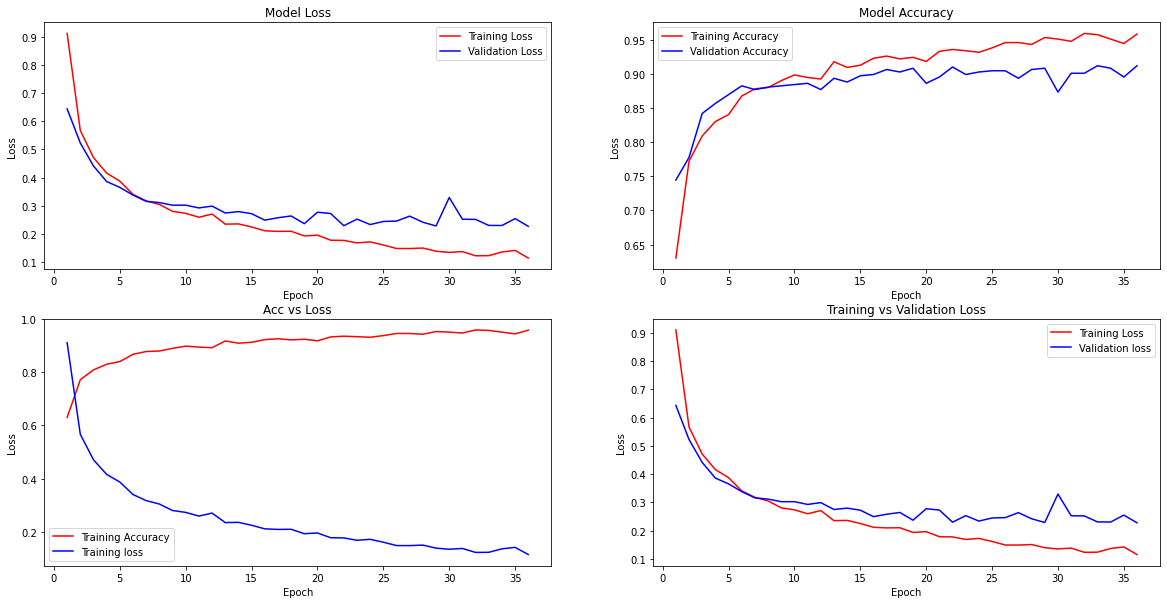

In [ ]:
#VGG16
training_loss = H.history['loss']
accuracy = H.history['sparse_categorical_accuracy']
val_loss = H.history['val_loss']
val_acc = H.history['val_sparse_categorical_accuracy']
# Visualize loss and accuracy history
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.subplot(2,2,1)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'b')

plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(range(1, len(accuracy) + 1), accuracy, 'r')
plt.plot(range(1, len(val_acc) + 1), val_acc, 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,3)
plt.plot(range(1, len(accuracy) + 1), accuracy, 'r')
plt.plot(range(1, len(training_loss) + 1), training_loss, 'b')
plt.legend(['Training Accuracy', 'Training loss'])
plt.title('Acc vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,4)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'b')
plt.legend(['Training Loss', 'Validation loss'])
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

VGG19

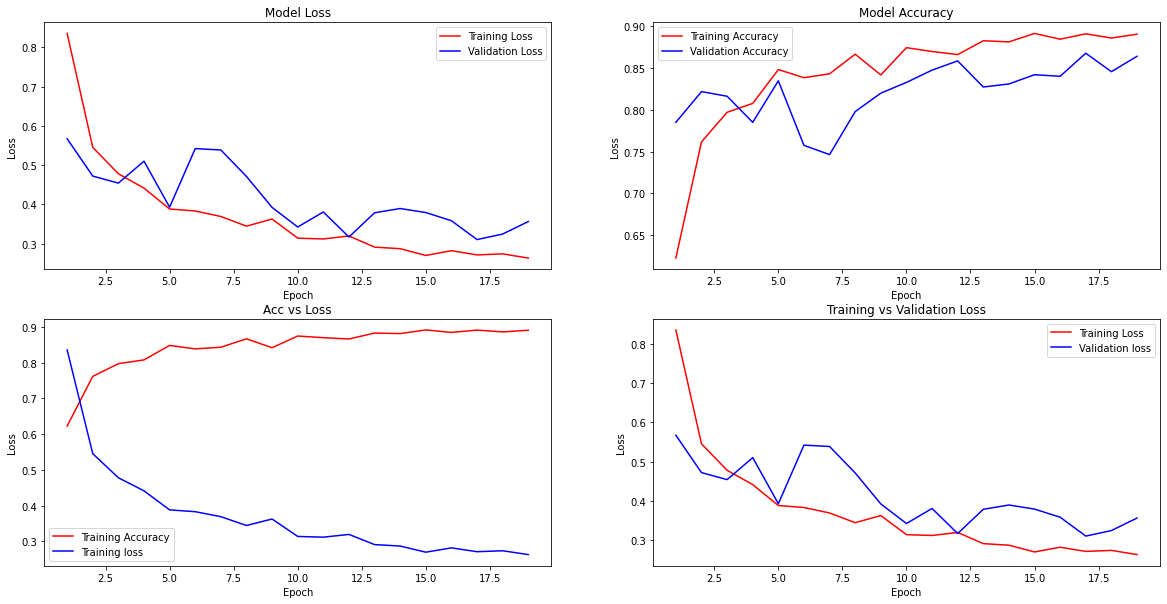

In [ ]:
#VGG19
training_loss = Hv19.history['loss']
accuracy = Hv19.history['sparse_categorical_accuracy']
val_loss = Hv19.history['val_loss']
val_acc = Hv19.history['val_sparse_categorical_accuracy']
# Visualize loss and accuracy history
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.subplot(2,2,1)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'b')

plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(range(1, len(accuracy) + 1), accuracy, 'r')
plt.plot(range(1, len(val_acc) + 1), val_acc, 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,3)
plt.plot(range(1, len(accuracy) + 1), accuracy, 'r')
plt.plot(range(1, len(training_loss) + 1), training_loss, 'b')
plt.legend(['Training Accuracy', 'Training loss'])
plt.title('Acc vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,4)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'b')
plt.legend(['Training Loss', 'Validation loss'])
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

DN201

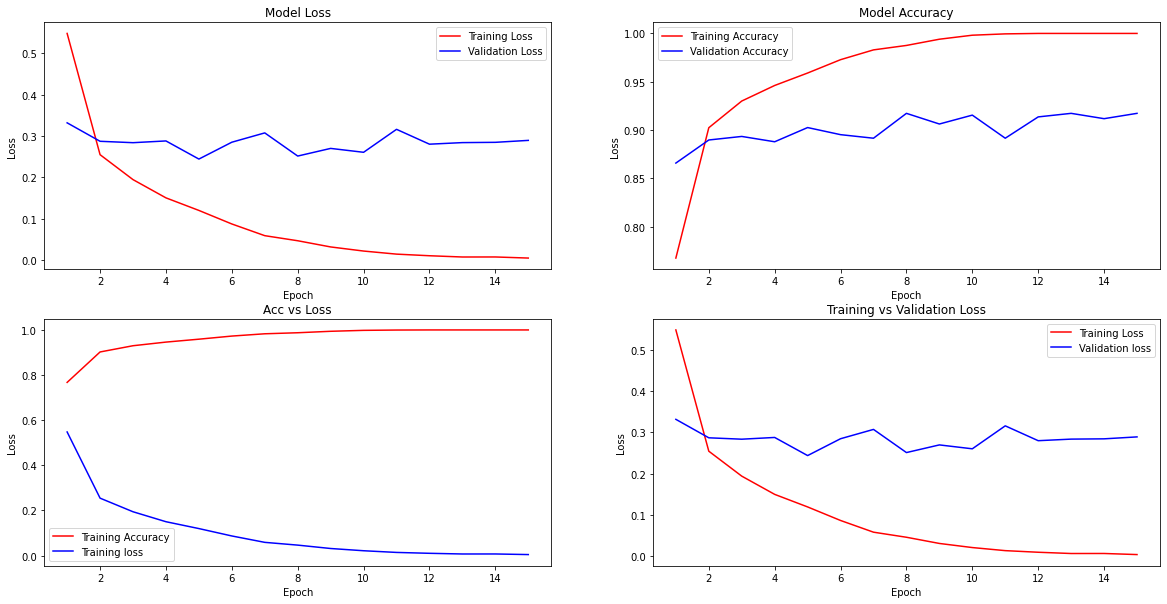

In [ ]:
#DN201
training_loss = H_DN.history['loss']
accuracy = H_DN.history['sparse_categorical_accuracy']
val_loss = H_DN.history['val_loss']
val_acc = H_DN.history['val_sparse_categorical_accuracy']
# Visualize loss and accuracy history
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.subplot(2,2,1)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'b')

plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(range(1, len(accuracy) + 1), accuracy, 'r')
plt.plot(range(1, len(val_acc) + 1), val_acc, 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,3)
plt.plot(range(1, len(accuracy) + 1), accuracy, 'r')
plt.plot(range(1, len(training_loss) + 1), training_loss, 'b')
plt.legend(['Training Accuracy', 'Training loss'])
plt.title('Acc vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2,2,4)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'b')
plt.legend(['Training Loss', 'Validation loss'])
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
# Check OS, disk
!cat /etc/os-release
!lsblk -o MODEL,SIZE,NAME -d


#use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'
!nvidia-smi

!lscpu |grep 'Model name'

#no.of sockets i.e available slots for physical processors
!lscpu | grep 'Socket(s):'

#no.of cores each processor is having
!lscpu | grep 'Core(s) per socket:'

#no.of threads each core is having
!lscpu | grep 'Thread(s) per core'

!lscpu | grep "L3 cache"

#if it had turbo boost it would've shown Min and Max MHz also but it is only showing current frequency this means it always operates at 2.3GHz
!lscpu | grep "MHz"

#memory that we can use
!free -h --si | awk  '/Mem:/{print $2}'

#hard disk space that we can use
!df -h / | awk '{print $4}'

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
MODEL             SIZE NAME
                  170G loop0
PersistentDisk    180G sda
Wed Dec  1 04:37:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|=================